# Аренда жилья в Индии

## Описание предметной области
В качестве предметной области выбрана такая актуальная тема для такой страны, как Индия (одна из самых заселенных стран в мире), как аренда недвижимости. Включает она такие пункты, как:
1)	количество комнат;
2)	стоимость аренды в месяц;
3)	метраж;
4)	тип объекта;
5)	расположение;
6)	город;
7)	состояние объекта;
8)	количество ванных;
9)	кто сдает объект.


Эти данные можно проанализировать, сделать выводы и использовать в следующих целях:

1)	нахождение самых дорогих районов;
2)	нахождение самых дешевых объектов;
3)	поиск объекта с самым выгодным предложением по оплате;
4)	нахождение самых выгодных городов, для съема жилья.
10)	количество комнат;
11)	стоимость аренды в месяц;
12)	метраж;
13)	тип объекта;
14)	расположение;
15)	город;
16)	состояние объекта;
17)	количество ванных;
18)	кто сдает объект.


# Предобработка данных


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st

import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4743 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4743 non-null   datetime64[ns]
 1   BHK                4743 non-null   int64         
 2   Rent               4743 non-null   int64         
 3   Size               4743 non-null   int64         
 4   Floor              4743 non-null   object        
 5   Area Type          4743 non-null   object        
 6   Area Locality      4743 non-null   object        
 7   City               4743 non-null   object        
 8   Furnishing Status  4743 non-null   object        
 9   Tenant Preferred   4743 non-null   object        
 10  Bathroom           4743 non-null   int64         
 11  Point of Contact   4743 non-null   object        
 12  Max Floor          4743 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 518.8+ 

# Дубликаты и пропуски

In [13]:
df.duplicated().sum()

0

In [14]:
def draw_missing(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum() / df.shape[0]) * 100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing(df)

,Total,Percent
Posted On,0,0.0
BHK,0,0.0
Rent,0,0.0
Size,0,0.0
Floor,0,0.0
Area Type,0,0.0
Area Locality,0,0.0
City,0,0.0
Furnishing Status,0,0.0
Tenant Preferred,0,0.0


пропуски не выявлены

# Обработка столбцов

Обработка даты

In [15]:
df['Posted On'] =  pd.to_datetime(df['Posted On'], dayfirst=True)

Новый столбец - количество этажей в доме

In [16]:
df['Max Floor'] = df['Floor'].apply(lambda floor: floor.split()[-1])

Изменение столбца Floor - теперь это номер этажа

In [17]:
def foo(floor: str):
    flr = floor.split()[0]
    return '0' if flr[0] == 'G' else flr

df.loc[:, 'Floor'] = df.Floor.apply(foo)

In [18]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Max Floor
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


Удаление одного обьявления с типом жилья 'Built Area'
Переименование продавцов

In [19]:
df = df[df['Point of Contact'] != 'Contact Builder']
df = df[df['Area Type'] != 'Built Area']
df['Point of Contact'] = df['Point of Contact'].map(lambda x: str(x).split()[-1])

In [20]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Max Floor
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Owner,2
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner,2


# Скоррелированность признаков

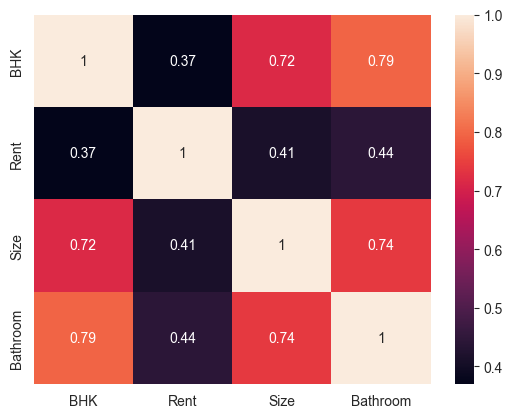

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Из графика корреляции видно, что санузлов больше в квартирах, где больше комнат
Количество санузлов сильно коррелировано с количеством комнат
Количество санузлов сильно скоррелировано с площадью
Площадь сильно скоррелировано с количеством комнат

# Города с самым большим количеством объявлений

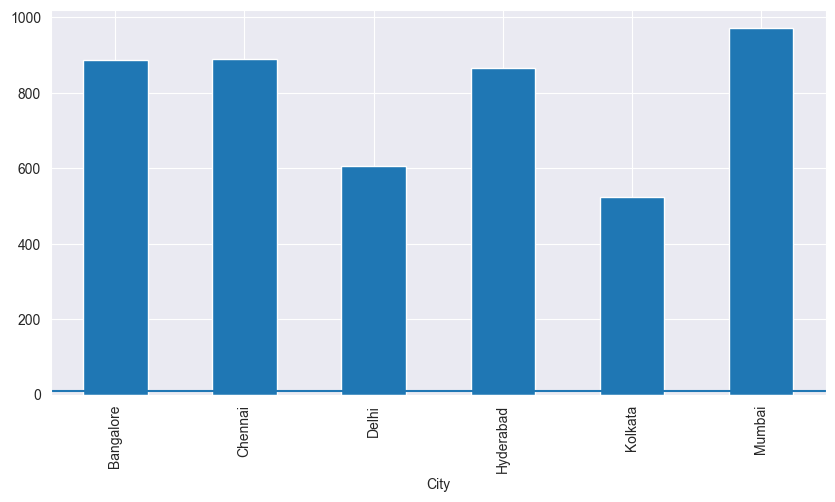

In [21]:
cities = df.groupby(['City']).count()['Floor']
plt.figure(figsize=(10, 5))
cities.plot.bar()
plt.axhline(10)
plt.show()

Данный график показывает, в каких городах больше всего сдают жилье. Можно сделать вывод, что в самых больших городах предложений по аренде больше всего.


# Средняя цена аренды в Индии

In [22]:
average_cost = round(df.Rent.mean())
median_cost = round(df.Rent.median())
print(f"Средняя цена - {average_cost}\nМедианная цена - {median_cost}")

Средняя цена - 35010
Медианная цена - 16000


Данный график показывает, что выгоднее всего по соотношению метраж/цена можно снять квартиру в Хиберабаде

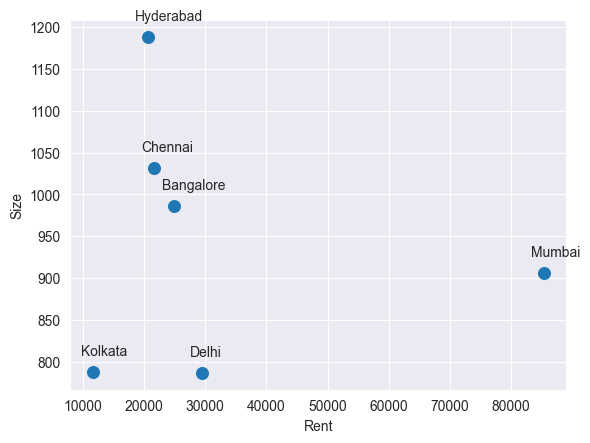

In [23]:
cities = df.groupby('City').mean(numeric_only=True)[['Size', 'Rent']]
text = cities.index.values
scat = cities.plot.scatter(x='Rent', y='Size', s=70)

for i in range(len(cities)):
    plt.annotate(text[i], (cities['Rent'][i] - 2000, cities['Size'][i] + 20))
plt.show()

# 1.Гипотеза. Преобладают квартиры с низкими ценами
То есть большая часть квартир имеет цену ниже средней

In [24]:
print(f"Средняя цена - {average_cost}\nМедианная цена - {median_cost}")

Средняя цена - 35010
Медианная цена - 16000


In [25]:
prices = df.Rent.describe().apply(lambda x: round(x))
prices = prices.drop(labels=['count', 'min', 'max'])
prices = prices.sort_values()
count = []
last_price = prices.max()
for i in prices:
    num = df.Rent.apply(lambda x: x if int(x) <= int(i) else None).count()
    count.append(num)
    last_price = i

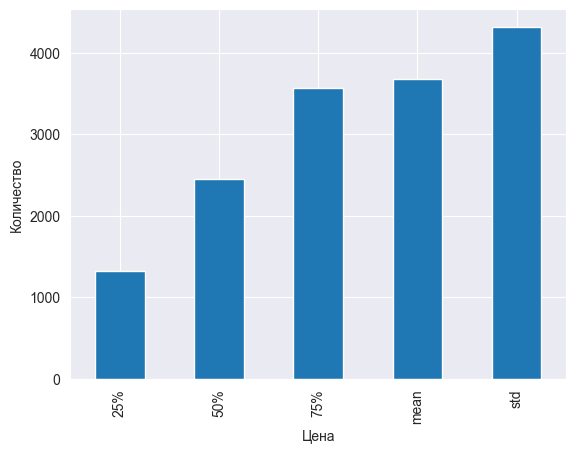

In [26]:
pricesDF = pd.Series(data=count, index=prices.index.values)
pricesDF.plot.bar(ylabel='Количество', xlabel='Цена')
plt.show()

Процент кварир с ценой ниже средней

In [27]:
df[df.Rent < df.Rent.mean()].shape[0] / df.shape[0] * 100

77.60910815939279

# Гипотеза подтвердилась
# Вывод
77% обьявлений имеют цену ниже средней.
То есть большая часть обьявлений - для менее обеспеченых людей.
Это возможно связано с бедностью большей части населения в Индии.

# 2. Гипотеза. В июле цены на обьявления выше, чем в мае

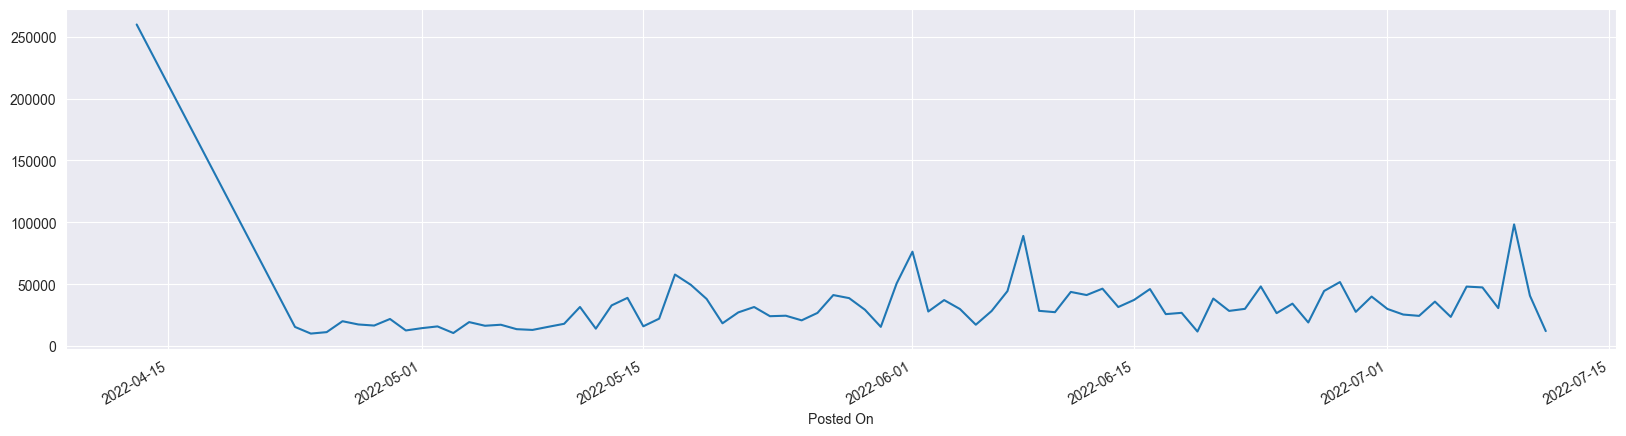

In [28]:
df.groupby('Posted On')['Rent'].mean().plot(figsize=(20, 5))
plt.show()

# Гипотеза подтвердилась
# Вывод
В июне и июле цены выше, чем в мае
Это может быть связано с тем, что летом люди уезжают в отпуск и сдают свое жилье в аренду

# 3. Гипотеза.
# В Super Area у Agent дороже, чем у Owner.
# А в Carpet Area у Agent дешевле, чем у Owner

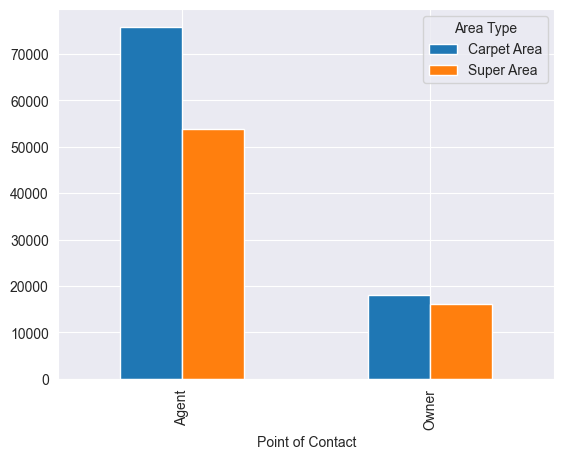

In [29]:
pd.crosstab(df['Point of Contact'], df['Area Type'], values=df['Rent'], aggfunc=np.mean).plot.bar()
plt.show()

# Гипотеза не подтвердилась
# Вывод
У риэлтора цены гораздо выше, чем у владельцев

Это связано с комиссией, которую берет риэлтор
Также это может быть связано с тем, что богатые люди с дорогим жильем, чаще всего прибегают к помощи риэлтора.

# 4. Гипотеза. В Carpet Area в среднем сдают обьявления с большим количеством комнат, чем в Super Area

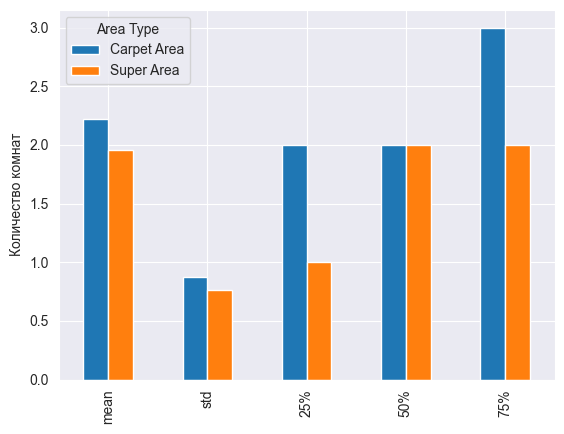

In [30]:
rooms = df.groupby('Area Type')['BHK'].describe().T.drop(['count', 'min', 'max'])
rooms.plot.bar(ylabel='Количество комнат')
plt.show()

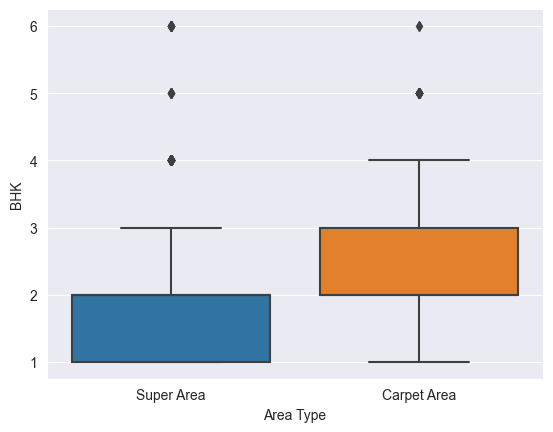

In [31]:
sns.boxplot(data=df, x='Area Type', y='BHK')
plt.show()

По ящику с усами видно, что распределение количества квартир в пригороде сдвинуто вправо.
В среднем в пригороде сдают квартиры с большим количеством комнат, чем в центре городов.

# Гипотеза подтвердилась
# Вывод
Так как в пригороде живет более бедное население, в квартирах больше комнат, чем в центрах.
Это связано с тем, что у бедного населения выше рождаемость